<a href="https://colab.research.google.com/github/denisecammarota/icgpu/blob/main/tpfinal/TimeCorr_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento preliminar

In [1]:
pip install geopandas

In [2]:
pip install mapclassify

In [3]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import pandas as pd
plt.style.use('seaborn')

In [4]:
localidades = ['Buenos Aires','CABA','Catamarca','Chaco','Chubut','Corrientes',
               'Córdoba','Entre Ríos','Formosa','Jujuy','La Pampa','La Rioja','Mendoza',
               'Misiones','Neuquén','Río Negro','Salta','San Juan',
               'San Luis','Santa Cruz','Santa Fe','Santiago del Estero','Tierra del Fuego',
               'Tucumán']

In [5]:
datos = pd.read_csv('localidades_corr.csv',sep=",",header=None)
datos2 = pd.read_csv('localidades_lag.csv',sep=",",header=None)
matriz = datos.to_numpy()
matriz2 = datos2.to_numpy()

In [6]:
matrix = np.delete(matriz,16,0)
matrix2 = np.delete(matriz2,16,0)
matrix = np.delete(matrix,16,1)
matrix2 = np.delete(matrix2,16,1)

In [7]:
natalidad = "provincias_argentinas_polygon.geojson"
map_data = gpd.read_file(natalidad)

In [8]:
map_data

,cartodb_id,description,name,provincia,id,codpcia,c_indec,id_dyp,geometry
0,1,,,Ciudad Autónoma de Buenos Aires,1,1,2,1,"MULTIPOLYGON (((-58.39007 -34.66230, -58.39037..."
1,3,,,Catamarca,3,3,10,4,"MULTIPOLYGON (((-66.59111 -26.17318, -66.58961..."
2,4,,,Chaco,4,4,22,6,"MULTIPOLYGON (((-62.34757 -24.11021, -62.34407..."
3,5,,,Chubut,5,5,26,7,"MULTIPOLYGON (((-71.77158 -41.99955, -71.67446..."
4,7,,,Corrientes,7,7,18,5,"MULTIPOLYGON (((-58.89298 -27.99935, -58.89182..."
5,8,,,Entre Ríos,8,8,30,8,"MULTIPOLYGON (((-59.66084 -30.34857, -59.65614..."
6,9,,,Formosa,9,9,34,9,"MULTIPOLYGON (((-62.34465 -22.45495, -62.33563..."
7,10,,,Jujuy,10,10,38,10,"MULTIPOLYGON (((-64.44379 -23.63491, -64.44048..."
8,11,,,La Pampa,11,11,42,11,"MULTIPOLYGON (((-65.10672 -34.99768, -65.02612..."
9,12,,,La Rioja,12,12,46,12,"MULTIPOLYGON (((-69.09436 -27.77274, -69.01274..."


In [9]:
map_data.id -= 1

In [10]:
map_data.id[0] = 1
map_data.id[4] = 5
map_data.id[21] = 6
map_data.id[23] = 23
map_data.id[14:21] = map_data.id[14:21] + 1
map_data.id[22] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [11]:
map_data

,cartodb_id,description,name,provincia,id,codpcia,c_indec,id_dyp,geometry
0,1,,,Ciudad Autónoma de Buenos Aires,1,1,2,1,"MULTIPOLYGON (((-58.39007 -34.66230, -58.39037..."
1,3,,,Catamarca,2,3,10,4,"MULTIPOLYGON (((-66.59111 -26.17318, -66.58961..."
2,4,,,Chaco,3,4,22,6,"MULTIPOLYGON (((-62.34757 -24.11021, -62.34407..."
3,5,,,Chubut,4,5,26,7,"MULTIPOLYGON (((-71.77158 -41.99955, -71.67446..."
4,7,,,Corrientes,5,7,18,5,"MULTIPOLYGON (((-58.89298 -27.99935, -58.89182..."
5,8,,,Entre Ríos,7,8,30,8,"MULTIPOLYGON (((-59.66084 -30.34857, -59.65614..."
6,9,,,Formosa,8,9,34,9,"MULTIPOLYGON (((-62.34465 -22.45495, -62.33563..."
7,10,,,Jujuy,9,10,38,10,"MULTIPOLYGON (((-64.44379 -23.63491, -64.44048..."
8,11,,,La Pampa,10,11,42,11,"MULTIPOLYGON (((-65.10672 -34.99768, -65.02612..."
9,12,,,La Rioja,11,12,46,12,"MULTIPOLYGON (((-69.09436 -27.77274, -69.01274..."


In [12]:
map_data = map_data.sort_values('id')

In [13]:
map_data['Corr_BuenosAires'] = matrix[:,0]
map_data['Corr_CABA'] = matrix[:,1]
map_data['Lag_BuenosAires'] = matrix2[0,:]
map_data['Lag_CABA'] = matrix2[1,:]

In [14]:
map_data

,cartodb_id,description,name,provincia,id,codpcia,c_indec,id_dyp,geometry,Corr_BuenosAires,Corr_CABA,Lag_BuenosAires,Lag_CABA
22,2,,,Provincia de Buenos Aires,0,2,6,3,"MULTIPOLYGON (((-58.46189 -34.53477, -58.46222...",0.976064,0.918048,-9.0,-30.0
0,1,,,Ciudad Autónoma de Buenos Aires,1,1,2,1,"MULTIPOLYGON (((-58.39007 -34.66230, -58.39037...",0.918048,0.976064,12.0,-9.0
1,3,,,Catamarca,2,3,10,4,"MULTIPOLYGON (((-66.59111 -26.17318, -66.58961...",0.824620,0.771627,-77.0,-112.0
2,4,,,Chaco,3,4,22,6,"MULTIPOLYGON (((-62.34757 -24.11021, -62.34407...",0.835697,0.790658,-59.0,-88.0
3,5,,,Chubut,4,5,26,7,"MULTIPOLYGON (((-71.77158 -41.99955, -71.67446...",0.887364,0.840639,-67.0,-90.0
4,7,,,Corrientes,5,7,18,5,"MULTIPOLYGON (((-58.89298 -27.99935, -58.89182...",0.768636,0.722077,-90.0,-115.0
21,6,,,Córdoba,6,6,14,2,"MULTIPOLYGON (((-65.41372 -30.12240, -65.39924...",0.865553,0.820100,-51.0,-76.0
5,8,,,Entre Ríos,7,8,30,8,"MULTIPOLYGON (((-59.66084 -30.34857, -59.65614...",0.867963,0.829095,-62.0,-88.0
6,9,,,Formosa,8,9,34,9,"MULTIPOLYGON (((-62.34465 -22.45495, -62.33563...",0.374262,0.397090,-53.0,16.0
7,10,,,Jujuy,9,10,38,10,"MULTIPOLYGON (((-64.44379 -23.63491, -64.44048...",0.852758,0.839377,-3.0,-22.0


# Analisis con todas las provincias

## Analisis con mapas

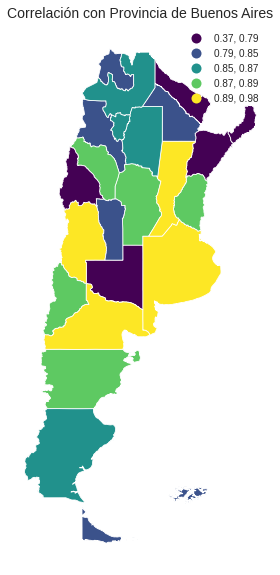

In [15]:
#@title 
ax = map_data.plot(column='Corr_BuenosAires', cmap='viridis',scheme='quantiles',
              legend=True,figsize=(15, 10),edgecolor='white',linewidth=0.8)
ax.set_axis_off()
plt.title('Correlación con Provincia de Buenos Aires',fontsize=14)
plt.savefig('Corr_BuenosAires.pdf')
plt.show()

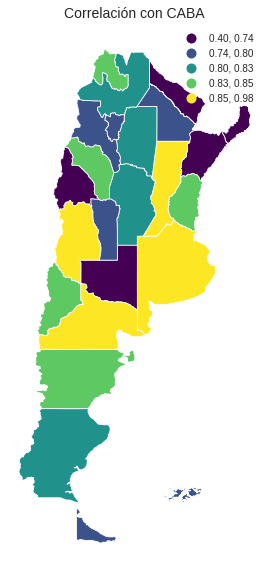

In [16]:
#@title 
ax = map_data.plot(column='Corr_CABA', cmap='viridis',scheme='quantiles',
              legend=True,figsize=(15, 10),edgecolor='white',linewidth=0.8)
ax.set_axis_off()
plt.title('Correlación con CABA',fontsize=14)
plt.savefig('Corr_CABA.pdf')
plt.show()

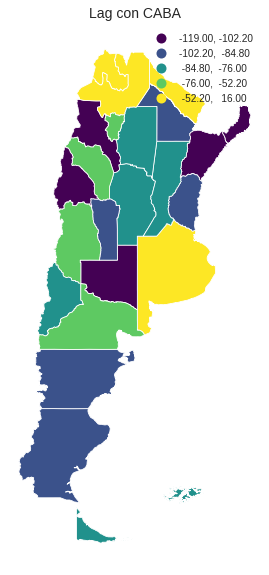

In [17]:
#@title 
ax = map_data.plot(column='Lag_CABA', cmap='viridis',scheme='quantiles',
              legend=True,figsize=(15, 10),edgecolor='white',linewidth=0.8)
ax.set_axis_off()
plt.title('Lag con CABA',fontsize=14)
plt.savefig('Lag_CABA.pdf')
plt.show()

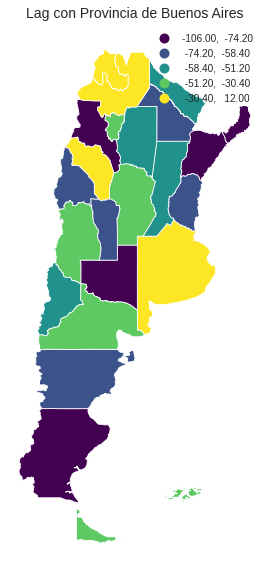

In [18]:
#@title 
ax = map_data.plot(column='Lag_BuenosAires', cmap='viridis',scheme='quantiles',
              legend=True,figsize=(15, 10),edgecolor='white',linewidth=0.8)
ax.set_axis_off()
plt.title('Lag con Provincia de Buenos Aires',fontsize=14)
plt.savefig('Lag_BuenosAires.pdf')
plt.show()

## Analisis graficando elementos de la matriz

In [19]:
#@title 
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

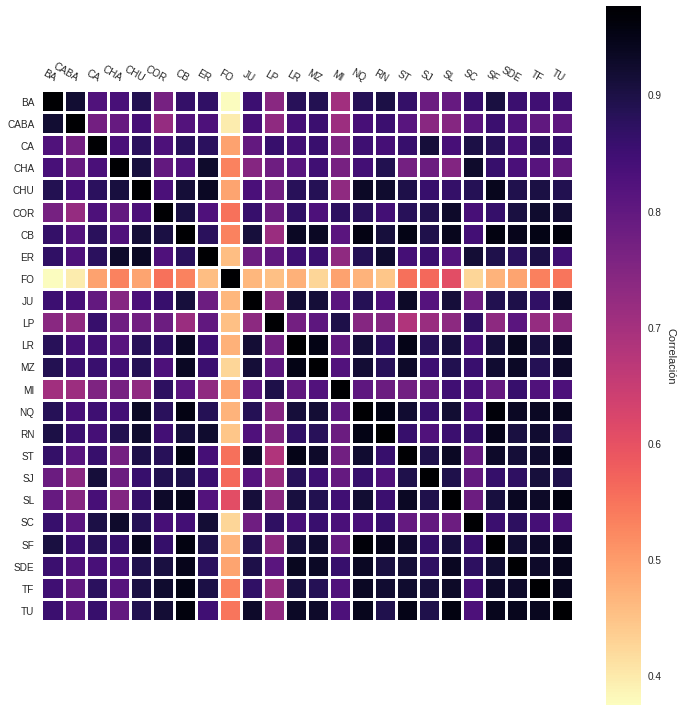

In [20]:
#@title 
fig, ax = plt.subplots(figsize=(10,10))

localidades_iniciales = ['BA','CABA','CA','CHA','CHU','COR','CB','ER','FO','JU','LP','LR','MZ','MI','NQ','RN','ST','SJ','SL','SC','SF','SDE','TF','TU']
im, cbar = heatmap(matrix, localidades_iniciales, localidades_iniciales, ax=ax,
                   cmap="magma_r", cbarlabel="Correlación")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

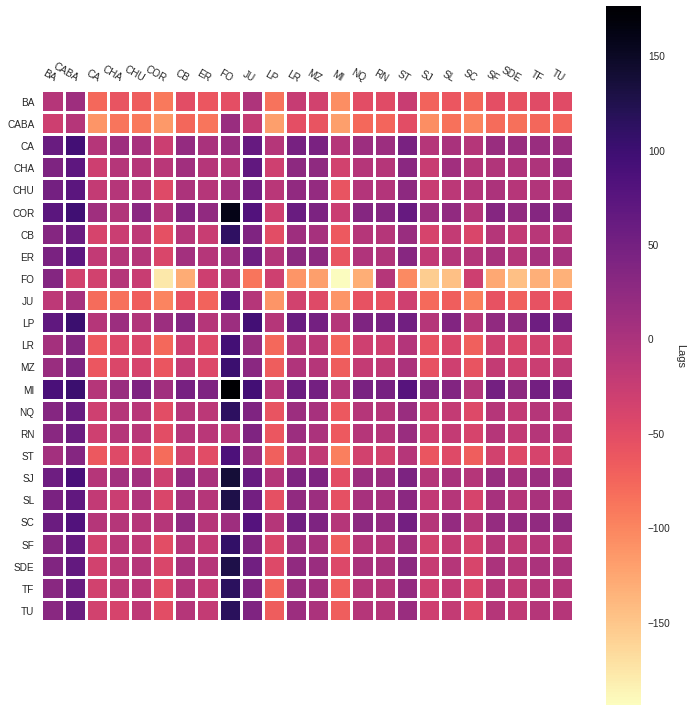

In [21]:
#@title 
fig, ax = plt.subplots(figsize=(10,10))

localidades_iniciales = ['BA','CABA','CA','CHA','CHU','COR','CB','ER','FO','JU','LP','LR','MZ','MI','NQ','RN','ST','SJ','SL','SC','SF','SDE','TF','TU']
im, cbar = heatmap(matrix2, localidades_iniciales, localidades_iniciales, ax=ax,
                   cmap="magma_r", cbarlabel="Lags")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

Si todo va como la intuición, todos los lags con Baires o con CABA deberian de ser negativos, ya que significa que esta señal es la 'leading signal', de acuerdo a la convención utilizada por numpy. Esto se ve en la mayoría de los casos, pero no en todos. Veamos cuáles son estos casos problemáticos y tratemos de hacer algo al respecto. 

Negativo: La provincia de la fila es leading respecto a la de la columna (tiene un maximo antes, por ejemplo)
Positivo: Al revez

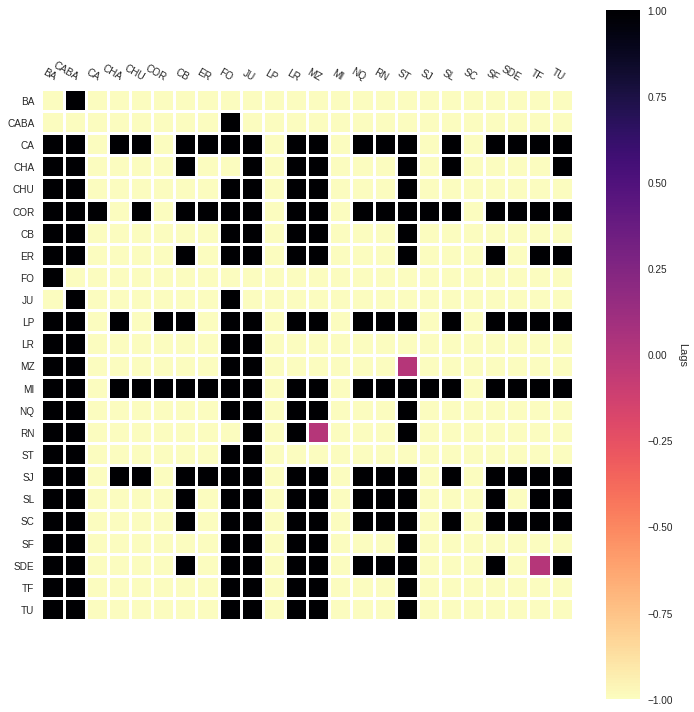

In [22]:
#@title 
matrix2_graph = np.zeros(shape=matrix2.shape)
matrix2_graph[matrix2 > 0] = 1
matrix2_graph[matrix2 < 0] = -1
fig, ax = plt.subplots(figsize=(10,10))

localidades_iniciales = ['BA','CABA','CA','CHA','CHU','COR','CB','ER','FO','JU','LP','LR','MZ','MI','NQ','RN','ST','SJ','SL','SC','SF','SDE','TF','TU']
im, cbar = heatmap(matrix2_graph, localidades_iniciales, localidades_iniciales, ax=ax,
                   cmap="magma_r", cbarlabel="Lags")
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")

plt.grid()
fig.tight_layout()
plt.show()

## Analisis con grafos?

fuente para esto: 

https://www.python-graph-gallery.com/327-network-from-correlation-matrix

https://towardsdatascience.com/visualising-stocks-correlations-with-networkx-88f2ee25362e

## Grafos normales

In [23]:
#@title 
import networkx as nx

In [24]:
#@title 
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: localidades_iniciales[x])

#shows the edges with their corresponding weights
G.edges(data=True)

EdgeDataView([('BA', 'BA', {'weight': 0.9760638297872336}), ('BA', 'CABA', {'weight': 0.9180476292626676}), ('BA', 'CA', {'weight': 0.8246196936937645}), ('BA', 'CHA', {'weight': 0.8356970925169795}), ('BA', 'CHU', {'weight': 0.8873644373580014}), ('BA', 'COR', {'weight': 0.7686364655133902}), ('BA', 'CB', {'weight': 0.865552892823426}), ('BA', 'ER', {'weight': 0.8679633482942982}), ('BA', 'FO', {'weight': 0.3742615994652688}), ('BA', 'JU', {'weight': 0.8527584683169426}), ('BA', 'LP', {'weight': 0.7399577126965532}), ('BA', 'LR', {'weight': 0.8800866000103094}), ('BA', 'MZ', {'weight': 0.8876643537002936}), ('BA', 'MI', {'weight': 0.705270776945265}), ('BA', 'NQ', {'weight': 0.8837989590137011}), ('BA', 'RN', {'weight': 0.8986475783951638}), ('BA', 'ST', {'weight': 0.8643731414935181}), ('BA', 'SJ', {'weight': 0.7839713020511565}), ('BA', 'SL', {'weight': 0.7920611143014245}), ('BA', 'SC', {'weight': 0.8586182393731667}), ('BA', 'SF', {'weight': 0.9052966279337052}), ('BA', 'SDE', {'w

In [25]:
#@title 
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 24
Number of edges: 300
Average degree:  25.0000


Un grafo simple, que termina siendo un lio, porque estan todos unidos con todos, por supuesto. 

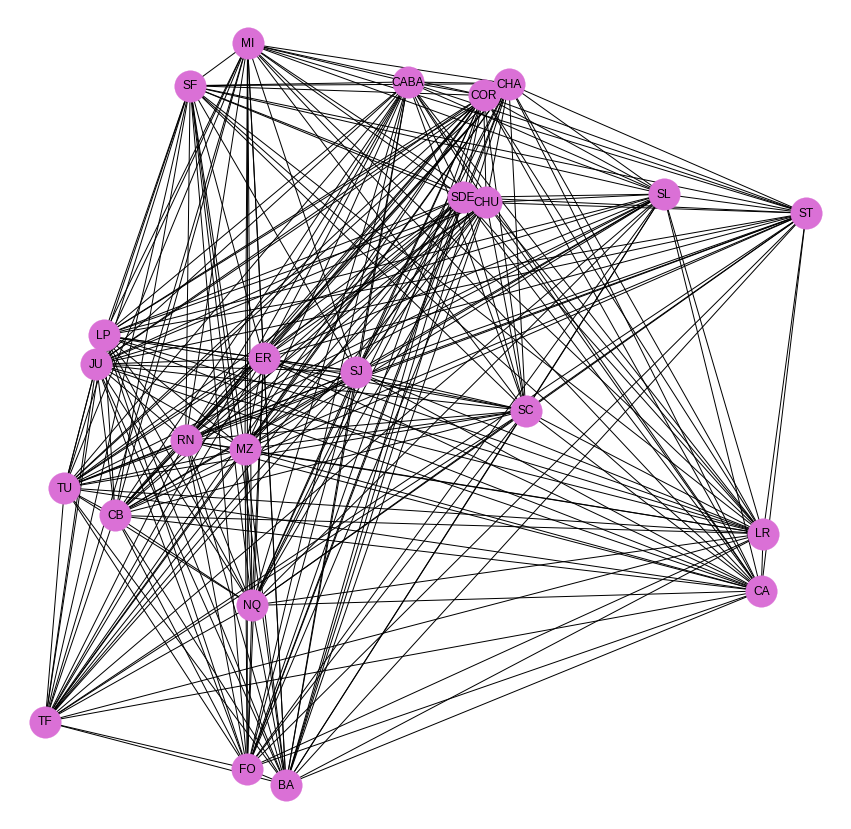

In [26]:
#@title 
#function to create and display networks from the correlatin matrix. 
def create_corr_network_1(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.random_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=1000,alpha=1)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=12, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges,style='solid')
    
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.pdf", format="pdf")
    plt.show() 
    return edges, positions,weights

edges,positions,weights = create_corr_network_1(G)

## Grafo con links por color

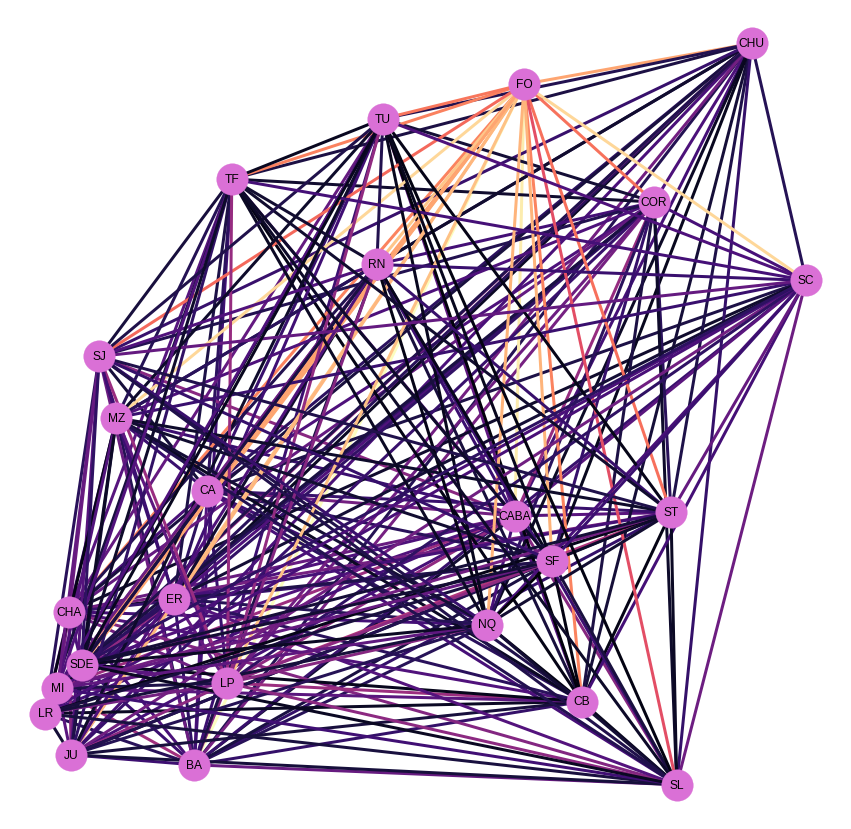

In [27]:
import matplotlib as mpl
#@title 
#function to create and display networks from the correlatin matrix. 
def create_corr_network_2(G):
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

    #positions
    positions=nx.random_layout(G)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(G,positions,node_color='#DA70D6',
                           node_size=1000,alpha=1)
    
    #Styling for labels
    nx.draw_networkx_labels(G, positions, font_size=12, 
                            font_family='sans-serif')
        
    #draws the edges
    nx.draw_networkx_edges(G, positions, edgelist=edges,edge_color=weights,edge_cmap=plt.cm.magma_r,width=3,edge_vmin=min(weights),edge_vmax=max(weights))
    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part1.pdf", format="pdf")
    plt.show() 

create_corr_network_2(G)

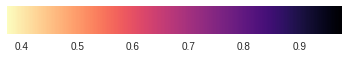

In [29]:
#@title 
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
ax = plt.gca()
cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')

## Grafo con links por color y filtrando

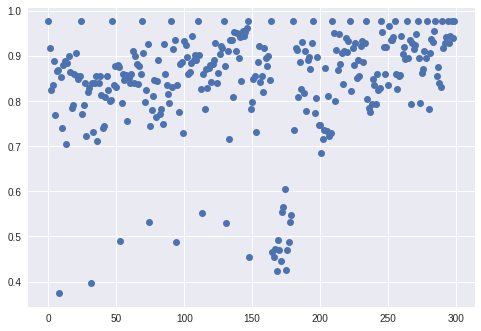

In [30]:
#@title 
plt.plot(weights,'o')

In [103]:
#@title 
aux = np.array(weights)
print('Mayores a 0.8: ',aux[(aux>0.8)].shape[0])
print('Mayores a 0.83: ',aux[(aux>0.83)].shape[0])
print('Mayores a 0.85: ',aux[(aux>0.85)].shape[0])
threshold = 0.83

Mayores a 0.8:  229
Mayores a 0.83:  204
Mayores a 0.85:  174


In [104]:
#@title 
G2 = G.copy()
edges2,weights2 = zip(*nx.get_edge_attributes(G2,'weight').items())
aux = np.array(weights2)
print(aux[aux > 0.85].shape)
j = 0
for i in weights2:
  if (i<threshold):
    G2.remove_edge(*edges2[j])
  j += 1
print(nx.info(G2))
edges2,weights2 = zip(*nx.get_edge_attributes(G2,'weight').items())

(174,)
Name: 
Type: Graph
Number of nodes: 24
Number of edges: 204
Average degree:  17.0000


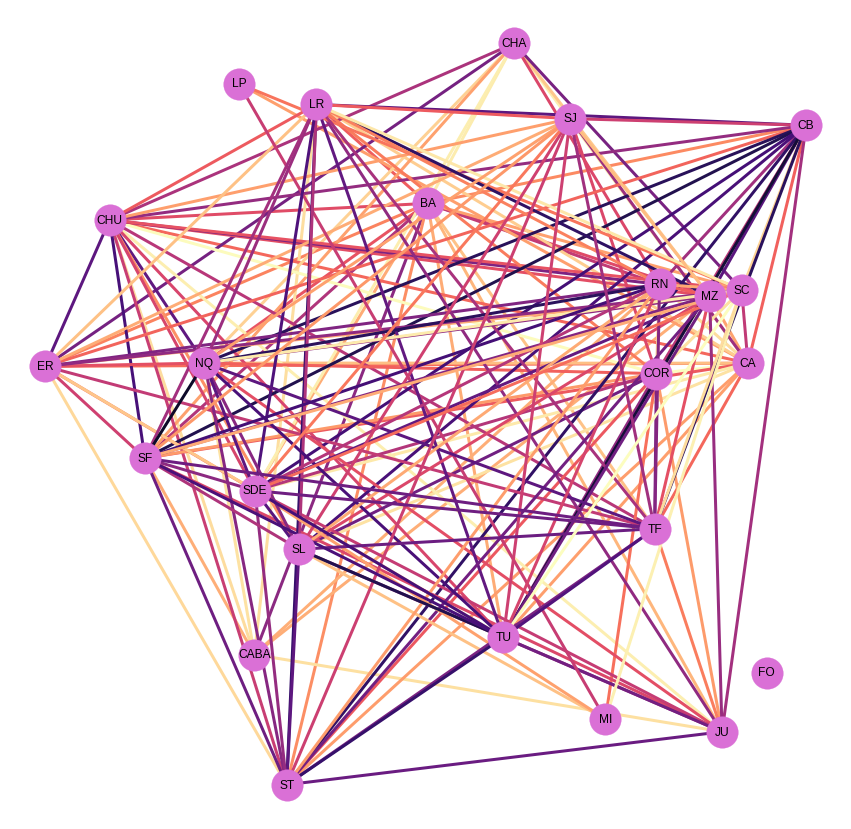

In [105]:
#@title 
create_corr_network_2(G2)

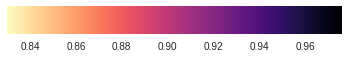

In [106]:
#@title 
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)
ax = plt.gca()
cmap = mpl.cm.magma_r
norm = mpl.colors.Normalize(vmin=min(weights2), vmax=max(weights2))
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    orientation='horizontal')

Contamos las conexiones por nodo/los edges por nodo

In [107]:
#@title 
links_localidad = []
for i in localidades_iniciales:
  links_aux = 0
  for j in localidades_iniciales:
      links_aux += G2.number_of_edges(i,j)
  links_localidad.append(links_aux-1)


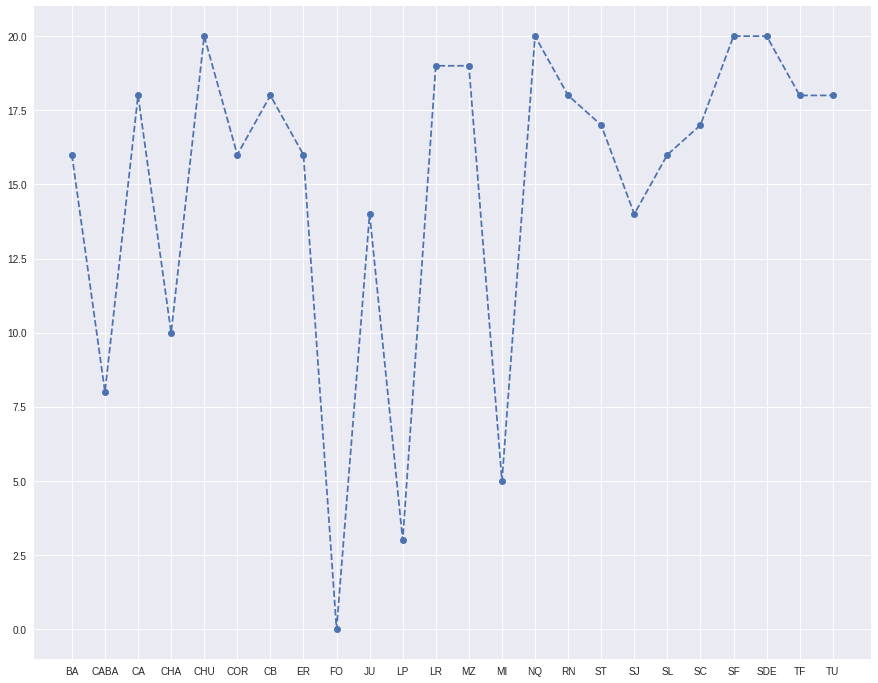

In [108]:
#@title 
f, ax = plt.subplots(figsize=(10*1.5,8*1.5))
plt.plot(np.arange(len(links_localidad)),links_localidad,'o--')
ax.set_xticks(np.arange(len(links_localidad)))
ax.set_xticklabels(localidades_iniciales)
plt.show()

## Grafo con lags como distancia y colores como indicador de correlación

In [114]:
G['CABA']

AtlasView({'BA': {'weight': 0.9180476292626676}, 'CABA': {'weight': 0.976063829787234}, 'CA': {'weight': 0.7716268096374458}, 'CHA': {'weight': 0.7906584959098157}, 'CHU': {'weight': 0.8406388549917077}, 'COR': {'weight': 0.7220767263692538}, 'CB': {'weight': 0.8201000228659607}, 'ER': {'weight': 0.8290947437625696}, 'FO': {'weight': 0.3970904426213648}, 'JU': {'weight': 0.8393774147296948}, 'LP': {'weight': 0.7301343209721513}, 'LR': {'weight': 0.8402134933803111}, 'MZ': {'weight': 0.8546025005770822}, 'MI': {'weight': 0.7109122235860207}, 'NQ': {'weight': 0.8389473021982595}, 'RN': {'weight': 0.8549818635737206}, 'ST': {'weight': 0.8137634743672852}, 'SJ': {'weight': 0.7391365772952899}, 'SL': {'weight': 0.7442196937381057}, 'SC': {'weight': 0.8095699325886162}, 'SF': {'weight': 0.8548424365002173}, 'SDE': {'weight': 0.8247222725489277}, 'TF': {'weight': 0.8008215991878077}, 'TU': {'weight': 0.802199003983575}})